In [1]:
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

### Cálculo exergoeconómico de un ciclo de doble etapa flash condiciones Cerro Prieto

Text(0.5, 1.0, 'Diagrama T-s')

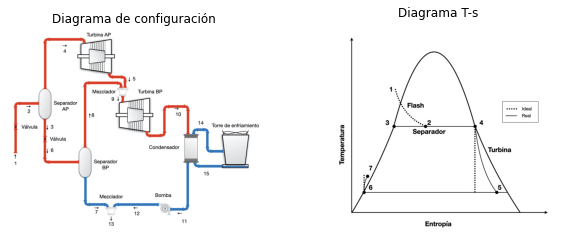

In [2]:
image1=io.imread("../fig/2etapas.jpeg")/255.0
image2=io.imread("../fig/001.jpeg")/255.0
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
plt.imshow(image1,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama de configuración") 
fig.add_subplot(1, 2, 2) 
plt.imshow(image2,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama T-s") 

In [3]:
T1 = 320 #ºC
P1 = 12 #bar
H_P1 = (steamTable.hL_t(T1))
P2 = P1
P3 = P2
P4 = P3
P7 = 3.95
P6 = P7
P5 = P6
P9 = P5
P8 = P9
P12 = P7
Flujo_mas1 = 473.81 #kg/s
P10 = 0.115 #bar
P11 = P10
nsf = 0.85
Ho = 317.17
So = 1.408
Po = 101.325*0.01
To = 293
T_cool=25
T_cout=30
c1 = 1.3
c2 = 1.39
c3 = 1.39
c4 = 1.39
c5 = 1.39
c6 = 1.39
c7 = 1.39
c8 = 1.39
c9 = 1.39
c10 = 1.39
c11 = 1.39
c12 = 1.39
c13 = 1.39
c14 = 1.39 
c15 = 1.39

### Para punto$_3$

In [4]:
x2 = (steamTable.x_ph(P2,H_P1))
H_P3 = (steamTable.hL_p(P3))
S_P3 = (steamTable.sL_p(P3))
T_P3 = (steamTable.t_ph(P3,H_P3))
Fm_P3 = 473.81 * (1-x2)
Ex3 = Fm_P3*((H_P3-Ho)-To*(S_P3-So))
C3 = (c3*Ex3)/1000000
Pt3 = T_P3,P3,H_P3,S_P3,Fm_P3,Ex3,C3,c3
x3 = 1-x2

### Para punto$_4$

In [5]:
H_P4 = (steamTable.hV_p(P4))
S_P4 = (steamTable.sV_p(P4))
T_P4 = (steamTable.t_ph(P4,H_P4))
Fm_P4 = 473.81 * x2
Ex4 = Fm_P4*((H_P4-Ho)-To*(S_P4-So))
C4 = (c4*Ex4)/1000000
Pt4 = T_P4,P4,H_P4,S_P4,Fm_P4,Ex4,C4,c4

### Para punto$_2$

In [6]:
T_P2 = T_P4
H_P2 = H_P1
S_P2 = (steamTable.s_ph(P2,H_P2))
Ex2 = Flujo_mas1*((H_P2-Ho)-To*(S_P2-So))
C2 = (c2*Ex2)/1000000
Pt2 = T_P2,P2,H_P2,S_P2,Flujo_mas1,Ex2,C2,c2

### Para punto$_5$

In [7]:
S_P5s = S_P4
H_P5s = (steamTable.h_ps(P5,S_P5s))
WITurbina = H_P4 - H_P5s
H_P5R = H_P4 - (nsf*WITurbina)
S_P5R = (steamTable.s_ph(P5,H_P5R))
T_P5 = (steamTable.t_ps(P5,S_P5R))
Fm_P5 = Fm_P4
Ex5 = Fm_P5*((H_P5R-Ho)-To*(S_P5R-So))
C5 = (c5*Ex5)/1000000
Pt5 = T_P5,P5,H_P5R,S_P5R,Fm_P5,Ex5,C5,c5

### Para punto$_6$

In [8]:
Fm_P6 = Fm_P3
T_P6 = T_P5
P6 = P5
H_P6 = H_P3
S_P6 = (steamTable.s_ph(P6,H_P6))
v6 = (steamTable.v_ph(P6,H_P6))
Ex6 = Fm_P6*((H_P6-Ho)-To*(S_P6-So))
C6 = (c6*Ex6)/1000000
Pt6 = T_P6,P6,H_P6,S_P6,Fm_P6,Ex6,C6,c6

### Para punto$_7$

In [9]:
T_P7 = T_P5
x8 = (steamTable.x_ph(P8,H_P6))
P7 = P5
H_P7 = (steamTable.hL_p(P7))
S_P7 = (steamTable.sL_t(T_P7))
v7 = (steamTable.v_ph(P7,H_P7))
x7 = 1-x8
Fm_P7 = Fm_P6 * (x7)
Ex7 = Fm_P7*((H_P7-Ho)-To*(S_P7-So))
C7 = (c7*Ex7)/1000000
Pt7 = T_P7,P7,H_P7,S_P7,Fm_P7,Ex7,C7,c7

### Para punto$_8$

In [10]:
H_P8 = (steamTable.hV_p(P8))
S_P8 = (steamTable.sV_p(P8))
T_P8 = (steamTable.t_ph(P8,H_P8))
Fm_P8 = Fm_P6 * x8
Ex8 = Fm_P8*((H_P8-Ho)-To*(S_P8-So))
C8 = (c8*Ex8)/1000000
Pt8 = T_P8,P8,H_P8,S_P8,Fm_P8,Ex8,C8,c8

### Para punto$_9$

In [11]:
P9 = P8
Fm_P9 = Fm_P8+Fm_P5
H_P9 = ((Fm_P5*H_P5R)+(Fm_P8*H_P8))/Fm_P9
S_P9 = (steamTable.s_ph(P9,H_P9))
T_P9 = (steamTable.t_ph(P9,H_P9))
Ex9 = Fm_P9*((H_P9-Ho)-To*(S_P9-So))
C9 = (c9*Ex9)/1000000
Pt9 =  T_P9,P9,H_P9,S_P9,Fm_P9,Ex9,C9,c9

### Para punto$_{10}$

In [12]:
S_P10s = S_P9
H_P10s = (steamTable.h_ps(P10,S_P10s))
WITurbina = H_P9 - H_P10s
H_P10R = H_P9 - (nsf*WITurbina)
S_P10R = (steamTable.s_ph(P10,H_P10R))
T_P10 = (steamTable.t_ps(P10,S_P10R))
Fm_P10 = Fm_P9
Ex10 = Fm_P10*((H_P10R-Ho)-To*(S_P10R-So))
C10 = (c10*Ex10)/1000000
Pt10 = T_P10,P10,H_P10R,S_P10R,Fm_P10,Ex10,C10,c10

### Para punto$_{11}$

In [13]:
P11 = P10
H_P11 = (steamTable.hL_p(P11))
T_P11 = (steamTable.t_ph(P11,H_P11))
S_P11 = (steamTable.sL_t(T_P11))
v11 = (steamTable.v_ph(P11,H_P11))
Fm_P11 = Fm_P10
Ex11 = Fm_P11*((H_P11-Ho)-To*(S_P11-So))
C11 = (c11*Ex11)/1000000
Pt11 = T_P11,P11,H_P11,S_P11,Fm_P11,Ex11,C11,c11

### Para punto$_{12}$

In [14]:
T_P12 = T_P10
H_P12 = (steamTable.h_pt(P12,T_P12))
S_P12 = (steamTable.sL_t(T_P12))
Fm_P12 = Fm_P10
Ex12 = Fm_P12*((H_P12-Ho)-To*(S_P12-So))
C12 = (c12*Ex12)/1000000
Pt12 = T_P12,P12,H_P12,S_P12,Fm_P12,Ex12,C12,c12

### Para punto$_{13}$

In [15]:
P13 = P12
Fm_P13 = Fm_P12+Fm_P7
H_P13 = ((Fm_P12*H_P12)+(Fm_P7*H_P7))/Fm_P13
S_P13 = (steamTable.s_ph(P13,H_P13))
T_P13 = (steamTable.t_ph(P13,H_P13))
Ex13 = Fm_P13*((H_P13-Ho)-To*(S_P13-So))
C13 = (c13*Ex13)/1000000
Pt13 =  T_P13,P13,H_P13,S_P13,Fm_P13,Ex13,C13,c13

### Para punto$_{14}$

In [16]:
T_P14 = T_cool
P14 = Po
H_P14 = (steamTable.h_pt(Po,T_P14))
S_P14 = (steamTable.s_pt(Po,T_P14))

### Para punto$_{15}$

In [17]:
T_P15 = T_cout
P15 = Po
H_P15 = (steamTable.h_pt(Po,T_P15))
S_P15 = (steamTable.s_pt(Po,T_P15))

### Flujo de calor en el condensador

In [18]:
Q_condensador = (H_P10R - H_P11)*(Fm_P11)
fm14 = Q_condensador/(H_P15-H_P14)
Fm_P14 = fm14
Fm_P15 = Fm_P14
Ex14 = Fm_P14*((H_P14-Ho)-To*(S_P14-So))
C14 = (c14*Ex14)/1000000
Pt14 =  T_P14,P14,H_P14,S_P14,Fm_P14,Ex14,C14,c14
Ex15 = Fm_P14*((H_P15-Ho)-To*(S_P15-So))
C15 = (c15*Ex15)/1000000
Pt15 =  T_P15,P15,H_P15,S_P15,Fm_P15,Ex15,C15,c15

### Potencia de salida de todo el sistema

In [19]:
W_bomba = v11 * (P12 - P11)*10000
W_turbina1 = ( H_P4 - H_P5R)*(Fm_P5)
W_turbina2 = ( H_P9 - H_P10R)*(Fm_P11)
W_turbina = W_turbina1+W_turbina2
Wtotal = (W_turbina1+W_turbina2) - W_bomba

In [20]:
Primera = Wtotal/(H_P2*(320-30))
Segunda = Wtotal / Ex2

In [21]:
R = [W_bomba, W_turbina,Wtotal, Q_condensador,Primera,Segunda]
columnas = ['Resultados']
filas = ['Bomba [kW]','Turbina [kW]','Potencia total [kW]','Flujo en el condensador [kW]','Eficiencia 1ra Ley','Eficiencia 2da Ley']
df2 = pd.DataFrame(R,columns = columnas, index = filas)
df2

,Resultados
Bomba [kW],38.790508
Turbina [kW],108677.129361
Potencia total [kW],108638.338853
Flujo en el condensador [kW],373263.205417
Eficiencia 1ra Ley,0.256226
Eficiencia 2da Ley,0.471380


In [22]:
Resultados = [Pt2, Pt3, Pt4, Pt5,Pt6,Pt7,Pt8,Pt9,Pt10,Pt11,Pt12,Pt13,Pt14,Pt15]
columnas = ['T [ºC]','P [bar]','h [kJ/kg]','s[kJ/kgK]','Flujo másico [kg/s]','Exergías [kW]','$^\dot C$[$/s]','c[$/GJ]']
filas = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(Resultados,columns = columnas, index = filas)
df

,T [ºC],P [bar],h [kJ/kg],s[kJ/kgK],Flujo másico [kg/s],Exergías [kW],$^\dot C$[$/s],c[$/GJ]
2,187.960983,12.00000,1462.051009,3.655320,473.810000,2.304689e+05,0.320352,1.39
3,187.980061,12.00000,798.498906,2.216296,315.444848,7.712568e+04,0.107205,1.39
4,187.960983,12.00000,2783.769133,6.521687,158.365152,1.533432e+05,0.213147,1.39
5,143.159621,3.95000,2610.687788,6.595055,158.365152,1.225288e+05,0.170315,1.39
6,143.159621,3.95000,798.498906,2.242073,315.444848,7.474321e+04,0.103893,1.39
7,143.159621,3.95000,602.775535,1.771935,286.522909,5.127977e+04,0.071279,1.39
8,143.150626,3.95000,2737.484758,6.899628,28.921939,2.346344e+04,0.032614,1.39
9,143.159621,3.95000,2630.268498,6.642089,187.287091,1.459923e+05,0.202929,1.39
10,48.568226,0.11500,2196.351374,6.880103,187.287091,5.166410e+04,0.071813,1.39
11,48.579001,0.11500,203.351197,0.685375,187.287091,1.833736e+04,0.025489,1.39


### Destrucción exergética

In [25]:
DexTHP = (Fm_P4*To)*(S_P5R-S_P4)
DexSHP = Ex2-(Ex4+Ex3)
DexTLP = (Fm_P9*To)*(S_P10R-S_P9)
DexSLP = Ex6-(Ex8+Ex7)
DexC = (Ex10+Ex14)-(Ex11+Ex15)
DexB = (Fm_P11*To)*(S_P11-S_P12)
DexMI = (Ex5+Ex8)-(Ex9)
DexMII = (Ex12+Ex7)-(Ex13)
DexTot= DexTHP + DexTLP + DexMI+DexSHP + DexSLP +DexB+ DexC
Dex = DexC,DexTLP, DexTHP,DexSHP, DexSLP,DexMI, DexB,DexTot
Dex

(23837.713796181604,
 13061.088034328655,
 3404.3418748894123,
 5.820766091346741e-11,
 2.9103830456733704e-11,
 0.0,
 7.681123291517017,
 40310.82482869127)

### Cálculo económico

Tabla Jalilinasrabady (2018), Geothermics

In [24]:
## Constantes:

B1s = 2.25
B2s = 1.82
K1s = 1.4974
K2s = 0.4485
K3s = 0.1074
Fms = 1

K1t = 2.7051
K2t = 1.4398
K3t = -0.1776
Fbmt = 3.5

B1c = 1.63
B2c = 1.66
Fmc = 1
K1c = 4.3274
K2c = -0.3030
K3c = 0.1634
C1c = 0
C2c = 0